In [297]:
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
!ls -1

BST_DataSet.xlsx
README.md
test_tin.csv
train_tin.csv
Untitled.ipynb
'Тестовое задание по NLP от BST.docx'


In [70]:
df = pd.read_excel('BST_DataSet.xlsx', index_col=0)

In [98]:
df.head(30)

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
2011-01-01,-79049.0,5.244667,7.75,2.9,4.5,96.29,106.17151,5532900.0,19307.7,30.08,20669
2011-02-01,180475.0,5.144211,8.00,3.1,4.4,103.96,106.99964,5613700.0,19536.7,29.29,20680
2011-03-01,106845.0,5.021364,8.00,3.1,4.2,114.44,107.66304,5647000.0,19788.7,28.43,22673
2011-04-01,224890.0,4.558571,8.00,2.6,4.1,123.15,108.12599,5863400.0,20020.8,28.10,22519
2011-05-01,45856.0,4.795000,8.25,2.6,4.1,114.46,108.64500,5893400.0,20160.9,27.87,22779
2011-06-01,227020.0,4.934762,8.25,2.6,4.2,113.76,108.89488,6017200.0,20721.9,27.98,24137
2011-07-01,133756.0,4.777619,8.25,2.6,4.0,116.46,108.88399,6151200.0,20828.1,27.90,23598
2011-08-01,10165.0,5.215217,8.25,2.6,4.1,110.08,108.62267,6204500.0,21061.9,28.77,23051
2011-09-01,45398.0,5.873636,8.25,2.5,4.0,110.88,108.57922,6303700.0,21480.4,30.49,23468
2011-10-01,17145.0,6.443810,8.25,2.9,4.5,109.47,109.10040,6349700.0,21366.7,31.35,23602


In [116]:
df_train = df.iloc[:-12, :]

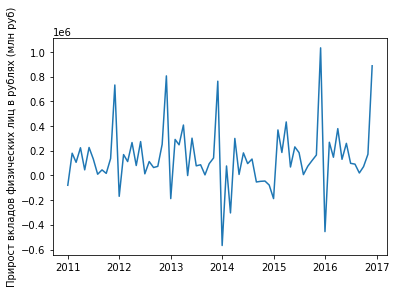

In [113]:
sns.lineplot(x=df_train.index, 
             y="Прирост вкладов физических лиц в рублях (млн руб)",
             data=df_train);

In [246]:
df_train['Прирост вкладов физических лиц в рублях (млн руб)'].min()

-567448.0

In [290]:
df_train['target'] = df_train['Прирост вкладов физических лиц в рублях (млн руб)'] - df_train['Прирост вкладов физических лиц в рублях (млн руб)'].min() +1

In [296]:
f'p-value: {adfuller(df_train.target)[1]}'

'p-value: 0.5024228765614351'

Ряд не стационарен

In [300]:
df_train['target_bx'] = boxcox(df_train.target)[0]

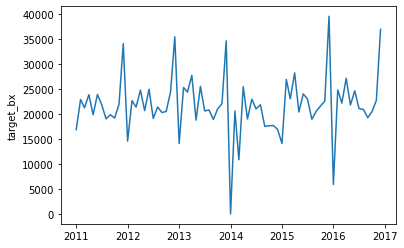

In [301]:
sns.lineplot(x=df_train.index, 
             y="target_bx",
             data=df_train);

In [302]:
f'p-value: {adfuller(df_train.target_bx)[1]}'

'p-value: 0.5154572848316563'

In [278]:
data = df_train.target

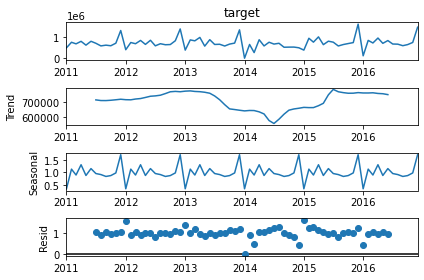

In [279]:
decompose_result = seasonal_decompose(data,model='multiplicative')
decompose_result.plot();

In [187]:
def rmse(y_true, y_pred):
    return np.sqrt(np.sum((y_true - y_pred)**2)/len(y_true))

In [114]:
def moving_average(series, n):
    return np.average(series[-n:])

moving_average(df_train['Прирост вкладов физических лиц в рублях (млн руб)'], 3)

377815.0

### Скользящее среднее / Moving Average

$\hat{y}_{t} = \dfrac{1}{k} \displaystyle\sum^{k-1}_{n=0} y_{t-n}$

In [117]:
df_train.head()

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
2011-01-01,-79049.0,5.244667,7.75,2.9,4.5,96.29,106.17151,5532900.0,19307.7,30.08,20669
2011-02-01,180475.0,5.144211,8.00,3.1,4.4,103.96,106.99964,5613700.0,19536.7,29.29,20680
2011-03-01,106845.0,5.021364,8.00,3.1,4.2,114.44,107.66304,5647000.0,19788.7,28.43,22673
2011-04-01,224890.0,4.558571,8.00,2.6,4.1,123.15,108.12599,5863400.0,20020.8,28.10,22519
2011-05-01,45856.0,4.795000,8.25,2.6,4.1,114.46,108.64500,5893400.0,20160.9,27.87,22779


In [304]:
df_train.target_bx.rolling(window=12, closed='both').mean()

2011-01-01             NaN
2011-02-01             NaN
2011-03-01             NaN
2011-04-01             NaN
2011-05-01             NaN
                  ...     
2016-08-01    22448.095692
2016-09-01    22472.015405
2016-10-01    22466.481550
2016-11-01    22555.032853
2016-12-01    23661.277331
Name: target_bx, Length: 72, dtype: float64

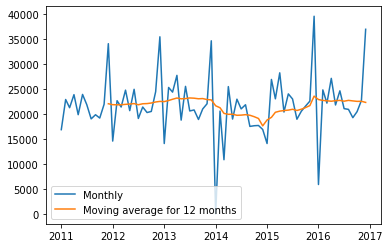

In [306]:
# Вычисляется скользящее среднее

n_months = 12

plt.plot(df_train.target_bx, label='Monthly')
plt.plot(df_train.target_bx.rolling(window=n_months, ).mean(), 
         label=f'Moving average for {n_months} months')
plt.legend();

### Взвешенное скользящее среднее / Weighted moving average

$\hat{y}_{t} = \displaystyle\sum^{k}_{n=1} \omega_n y_{t+1-n}$

In [307]:
# Функция взвешенного скользязщего среднего, веса нормируются в коде
def wma(x, n, weights):
    weights = np.array(weights)
    wmas = x.rolling(n).apply(lambda x: np.dot(x, weights) /
                                       weights.sum(), raw=True).to_list()
    return wmas

In [310]:
wma(df_train.target_bx, n=3, weights=[1,5,10])

[nan,
 nan,
 21509.45590258221,
 23005.707009397574,
 21212.34052869279,
 22657.74066913677,
 22392.63556842822,
 20228.542143414914,
 19728.5742389619,
 19395.676651035352,
 20970.854282891414,
 29371.570078386478,
 21142.62263179284,
 20858.820566269264,
 21376.890133378092,
 23599.23782240955,
 22008.772074858807,
 23607.885193015052,
 21037.354930156063,
 20913.181326690938,
 20574.889100064836,
 20509.399657718903,
 22980.54501051104,
 31100.383781402255,
 21424.42221756207,
 22448.590561895056,
 24040.563480733872,
 26546.925600959024,
 21936.56245228954,
 23567.44807854251,
 22042.883523231994,
 21051.816639113353,
 19615.738818998765,
 20347.17490746137,
 21539.819245605442,
 29875.751658274894,
 12212.605403765307,
 15038.766998247622,
 13219.53946190937,
 20613.827888700907,
 20519.075181824257,
 21889.049350159185,
 21513.031340090813,
 21674.942676057697,
 19100.801424677393,
 17879.050393789847,
 17682.334926420244,
 17209.260096690778,
 15203.42536826637,
 22293.571682674

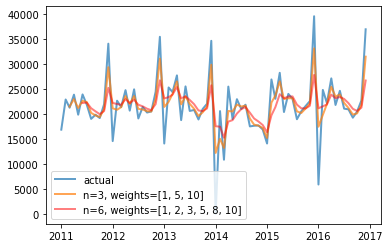

In [311]:
plt.plot(df_train.index, df_train.target_bx,
         linewidth=2, label='actual', alpha=.7)
plt.plot(df_train.index, wma(df_train.target_bx, n=3, weights=[1, 5, 10]), 
         linewidth=2, label=f'n=3, weights=[1, 5, 10]', alpha=.7)
plt.plot(df_train.index, wma(df_train.target_bx, n=6, weights=sorted([10, 8, 5, 3, 2, 1])),
         'r', linewidth=2, label=f'n=6, weights={sorted([10, 8, 5, 3, 2, 1])}', alpha=.5)
plt.legend();

### Экспоненциальное сглаживание / Exponential smoothing 

#### Простое экспоненциальное сглаживание

$\hat{y}_{t} = \alpha \cdot y_t + (1-\alpha) \cdot \hat y_{t-1}$

In [125]:
# Функция простого экспоненциального сглаживания
def exponential_smoothing(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

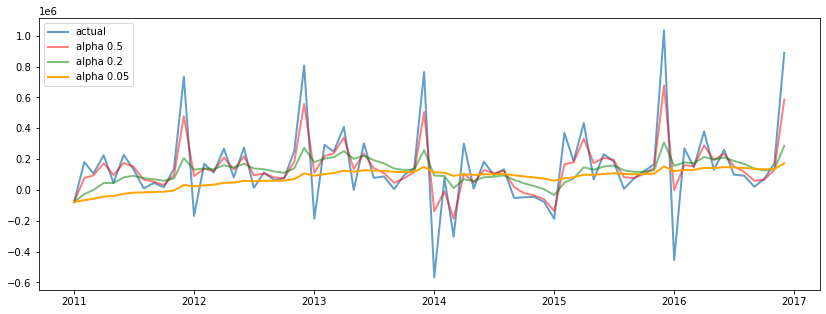

In [186]:
plt.figure(figsize=(14,5))
plt.plot(df_train.index, df_train['Прирост вкладов физических лиц в рублях (млн руб)'], linewidth=2, label='actual', alpha=.7)

# Применяем сглаживание с разными параметрами и записыем в переменные
exp_sm_5 = exponential_smoothing(df_train['Прирост вкладов физических лиц в рублях (млн руб)'], 0.6)
exp_sm_2 = exponential_smoothing(df_train['Прирост вкладов физических лиц в рублях (млн руб)'], 0.2)
exp_sm_05 = exponential_smoothing(df_train['Прирост вкладов физических лиц в рублях (млн руб)'], 0.05)

# Строим графики
plt.plot(df_train.index, exp_sm_5, 'r', linewidth=2, label='alpha 0.5', alpha=.5)
plt.plot(df_train.index, exp_sm_2, 'g', linewidth=2, label='alpha 0.2', alpha=.5)
plt.plot(df_train.index, exp_sm_05, 'orange', linewidth=2, label='alpha 0.05')
plt.legend();

# print(f'alpha=0.6   MSE:  {sum((df_train['Прирост вкладов физических лиц в рублях (млн руб)'].iloc[1:] - exp_sm_5[1:])**2) / (len(exp_sm_5)-1):.3f}')
# print(f'alhpa=0.2    MSE:  {sum((df_train['Прирост вкладов физических лиц в рублях (млн руб)'].iloc[1:] - exp_sm_2[1:])**2) / (len(exp_sm_05)-1):.3f}')
# print(f'alhpa=0.05    MSE: {sum((df_train['Прирост вкладов физических лиц в рублях (млн руб)'].iloc[1:] - exp_sm_05[1:])**2) / (len(exp_sm_05)-1):.3f}')

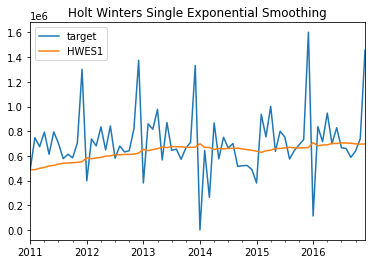

In [282]:
m = 12
alpha = 1/(2*m)
df_train['HWES1'] = SimpleExpSmoothing(df_train.target).fit(smoothing_level=alpha, optimized=False, use_brute=True).fittedvalues
df_train[['target','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');